# Signal Processing
## Week \#3 Lab

### Introduction

The purpose of this lab is to investigate sampling and reconstruction of signals. Aliasing will occur if the signal is not sampled at least twice the maximum frequency in the signal or the Nyquist rate. We investigate the principle that a band-limited signal can be reconstructed from its sample value if the sampling frequency is greater than twice the bandwidth.

### Install Python Packages

Import the necessary Python modules for implementing the lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Sampling and Reconstruction

#### Aliasing in the Time Domain

In a strict sense, we can't analyze analog signals in a computing program. However, as is our practice, we will use small enough spacing intervals that when plotting the signal in the time domain or plotting the discrete-time Fourier transform (a continuous function of normalized frequency, $\omega$) the plot is smooth and simulates the continuous signal in time or frequency.

To avoid aliasing, we need to sample a baseband signal at least twice the maximum frequency. For signals with a finite number of frequency components, we can determine the required sampling frequency to avoid aliasing. If the signal is not sampled fast enough to avoid aliasing, we can determine what frequencies exist in the signal in the reconstructed signal if the samples are sent through an ideal discrete-time to continuous-time converter.

Let's assume we have this sinusoid at 1,000 Hz:

\begin{equation*}
x(t) = \sin(2\pi 1000 t)
\end{equation*}

We need to sample at 2000 Hz to avoid aliasing but let's see what happens when this signal is sampled at 1600 Hz. The sampled signal is equivalent to replacing $t$ with $nT$ where $n$ is the sample index and $T$ is the sample period.

\begin{equation*}
x[n] = \sin\left(2\pi 1000 nT\right) = \sin\left(2\pi 1000 n \tfrac{1}{1600}\right) = \sin\left(\tfrac{5}{4}\pi  n \right)
\end{equation*}

The unique range of normalized frequencies in radians/sample for discrete-time signals is $-\pi$ to $\pi$ and discrete-time frequencies outside this range are integer multiples of $2 \pi$ radians from frequencies within the fundamental range and are therefore an alias.

\begin{equation*}
x[n] = \sin\left(\tfrac{5}{4}\pi  n -2\pi n\right) =  \sin\left(-\tfrac{3}{4}\pi n \right) = -\sin\left(\tfrac{3}{4}\pi n \right)
\end{equation*}

Therefore, the sampled signal is an alias of normalized frequency $\omega = \tfrac{3\pi}{4}$. Since the normalized frequency $\pi$ represents half the sample frequency, when this signal is reconstructed using an ideal discrete-time to continuous-time converter, the signal will have a frequency of $\left( \tfrac{3}{4} \right) \left( \tfrac{1600}{2}\right) =600$ Hz. The normalized frequency scaling relationship also provides the continuous-time signal frequency:

\begin{align*}
\omega &= \Omega T \\
\tfrac{3\pi}{4} &= 2\pi F \frac{1}{1600}\\
F &= 600 \text{ Hz}
\end{align*}

We use this information to plot the original signal at 1000 Hz, the samples, and the reconstructed signal at 600 Hz.

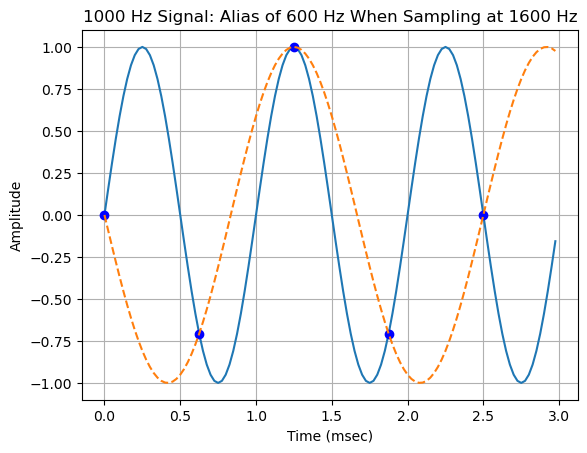

In [ ]:
# Create time vectors
t = np.arange(0,0.003,1/40000)
F = 1000
Fs = 1600
T = 1/Fs
nT = np.arange(0,0.003, T)

# Compute values of signals
xt = np.sin(2*np.pi*F*t)
xn = np.sin(2*np.pi*F*nT)
xr = -np.sin(2*np.pi*600*t)

# Plot signals
plt.figure()
plt.plot(t*1000,xt)
plt.plot(nT*1000,xn,'ob')
plt.plot(t*1000,xr,'--')
plt.xlabel('Time (msec)')
plt.ylabel('Amplitude')
plt.title('1000 Hz Signal: Alias of 600 Hz When Sampling at 1600 Hz')
plt.grid()

#### Reconstruction of a Bandlimited Signal From Its Samples
If sampled fast enough (above the Nyquist rate), a continuous-time bandlimited signal can be recovered from its samples if the sample period, $T$, is known. If $x[n]$ represents the samples, then the reconstructed signal, $x_r(t)$, is described mathematically using an interpolating formula:

\begin{equation*}
x_r(t) = \sum\limits_{n=-\infty}^{\infty} x[n] \frac{\sin\left[ \pi(t-nT)/T \right]}{\pi(t-nT)/T}
\end{equation*}

The is equivalent to an ideal lowpass reconstruction filter with bandwidth $-\pi$ to $\pi$ and impulse response:

\begin{equation*}
h_r(t) = \frac{\sin ( \pi t/T)}{\pi t /T} = \text{sinc} (t/T)
\end{equation*}

where we use the normalized sinc function defined as:

\begin{equation*}
\text{sinc} (x) = \frac{\sin (\pi x)}{\pi x}
\end{equation*}

While the process of reconstruction usually occurs via a lowpass filter, investigating the process in the time domain with the equation above to reconstruct $x_r(t)$ shows us how a signal can be reconstructed from its samples.

First, we look at a signal with one frequency component at 1000 Hz, its samples when the sampling frequency is 3000 Hz, and several of the scaled and shifted sinc functions that when added together will reconstruct the original signal.

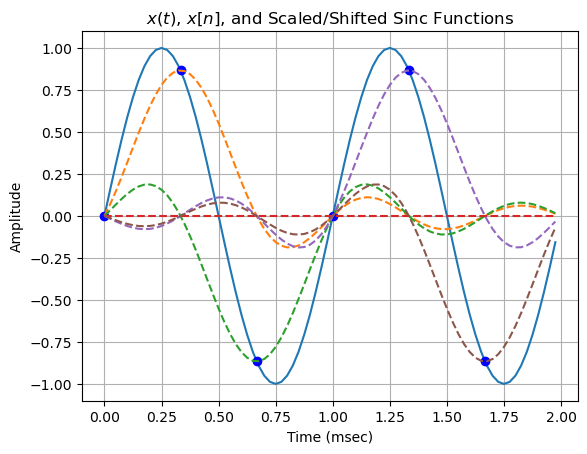

In [ ]:
# Create time vectors
t = np.arange(0,0.002,1/40000)
Fs = 3000
T = 1/Fs
nT = np.arange(0,0.002, T)

# Compute values of signals
xt = np.sin(2*np.pi*1000*t)
xn = np.sin(2*np.pi*1000*nT)
xs1 = xn[1] * np.sinc((t-T)/T)
xs2 = xn[2] * np.sinc((t-2*T)/T)
xs3 = xn[3] * np.sinc((t-3*T)/T)
xs4 = xn[4] * np.sinc((t-4*T)/T)
xs5 = xn[5] * np.sinc((t-5*T)/T)

# Plot signals
plt.figure()
plt.plot(t*1000,xt)
plt.plot(nT*1000,xn,'ob')
plt.plot(t*1000,xs1,'--',t*1000,xs2,'--',t*1000,xs3,'--',t*1000,xs4,'--',t*1000,xs5,'--')
plt.xlabel('Time (msec)')
plt.ylabel('Amplitude')
plt.title('$x(t)$, $x[n]$, and Scaled/Shifted Sinc Functions')
plt.grid()

Notice that the equation to create the reconstruction, $x_r(t)$ from its samples, $x[n]$, is a sum of an infinite number of scaled and delayed sinc functions for every value of $t$. To implement this on the computer, we will use a small enough spacing for $t$ so that the sinc functions appear continuous. Since the number of samples for $n$ will be finite, it is not possible to obtain the exact analog $x(t)$ (we won't compute the infinite summation). However, we can show that this formula does indeed appear to accurately reconstruct the signal from its samples when the original signal is sampled fast enough and conversely, we can see the effects of aliasing when the signal is not sampled fast enough.

Now that we have seen the individual elements of the reconstruction formula for $x_r(t)$, we implement the summation of the scaled and shifted sinc functions to reconstruct a sampled signal. Various approaches exist to computing the reconstruction in the time domain from the samples. To avoid nested loops, we present a method here using matrix multiplication. This might be more familiar to those with a Matlab background. Note that the * operator in NumPy is used for element-wise multiplication so matrix multiplication can be implemented with the np.dot function or using the matrix data structure (np.matrix(A)). The @ symbol is another option for matrix multiplication as it was adopted in Python 3.5. The original 1,000 Hz signal and the signal reconstructed from its samples using the interpolation are shown on the same plot. Why don't they match up perfectly?

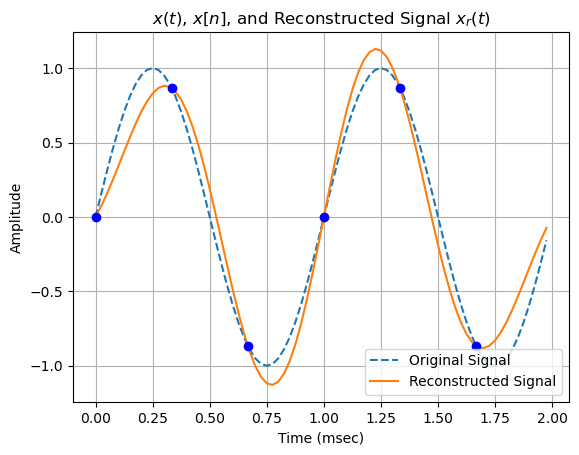

In [ ]:
# Create time vector to simulate "analog" signal (many samples)
t = np.arange(0,0.002,1/40000)

# Sampling parameters
Fs = 3000
T = 1/Fs
nT = np.arange(0,0.002, T)

# Create "analog" signal with frequency of 1,000 Hz
x = np.sin(2*np.pi*1000*t)

# Create sampled signal
xn = np.sin(2*np.pi*1000*nT)

# Create a matrix of delayed sinc functions
# the first matrix is t/T where rows correspond to n and columns correspond to t
# second matrix is nT/T where rows correspond to n and columns correspond to t
# sinc_matrix = sinc(first matrix - second matrix) = sinc(t/T - nT/T)
# Each row has a delayed sinc function where n corresponds to the row
sinc_matrix = np.sinc((np.matrix(np.ones(nT.size)).T * (t/T)) - ((np.matrix(nT/T)).T)*np.matrix(np.ones(t.size)))

# Reconstruct Signal (matrix multiplication computes the summation, sometimes called "vectorized")
xr_temp = np.matrix(xn) * sinc_matrix
xr_notmatrix = np.asarray(xr_temp)
xr = xr_notmatrix.flatten()

# Plot signals
plt.figure()
plt.plot(t*1000,x,'--')
plt.plot(t*1000,xr)
plt.plot(nT*1000,xn,'ob')
plt.xlabel('Time (msec)')
plt.ylabel('Amplitude')
plt.title('$x(t)$, $x[n]$, and Reconstructed Signal $x_r(t)$')
plt.grid()
plt.legend(['Original Signal', 'Reconstructed Signal'],loc='lower right');

### Exercise #1
Consider the following continuous-time signal:

\begin{equation*}
x(t) = 2\sin(2\pi 1000 t) + 2 \sin ( 2 \pi 4000 t) + \sin( 2 \pi 6000 t)
\end{equation*}

1. If the signal, $x(t)$, is sampled at a rate of 5 kHz and then reconstructed using an ideal discrete-time to continuous-time converter, determine the frequency components that exist in this reconstructed signal. Plot the original signal, the sampled signal (using a stem plot), and the reconstructed signal over the time period 0 to 2 milliseconds. Use a legend to distinguish between the signals. Don't use the reconstruction formula in this exercise; rather, determine the exact frequencies that exist in the reconstructed signal and plot those signals.
2. Repeat the above step for sampling rates of 10 kHz and 20 kHz.
3. Explain your results.

#### 5 kHz

$$
F_s = 5 kHz\\
F_1 = 1 kHz\\
\frac{F_1}{F_s} = \frac{\omega_1}{2\pi}\\
-\pi \leq \omega_1 = \frac{2}{5}\pi \leq \pi\\
$$
Therefore the first frequency component does not alias.

$$
F_2 = 4 kHz\\
\pi \leq \omega_2 = \frac{8}{5}\pi\\
$$
The second frequency aliases, meaning we measure the frequency as
$$
\omega_2 = -\frac{2}{5}\pi
$$

$$
F_3 = 6 kHz\\
\omega_3 = \frac{12}{5}\pi \text{ which, due to aliasing, is reconstructed as } \omega_3 = \frac{2}{5}\pi
$$

Converting back to the time domain, the reconstructed signal will be
$$
x_r(t) = 2\sin(2\pi1000t) - 2\sin(2\pi1000t) + \sin(2\pi1000t) = \sin(2\pi1000t)
$$

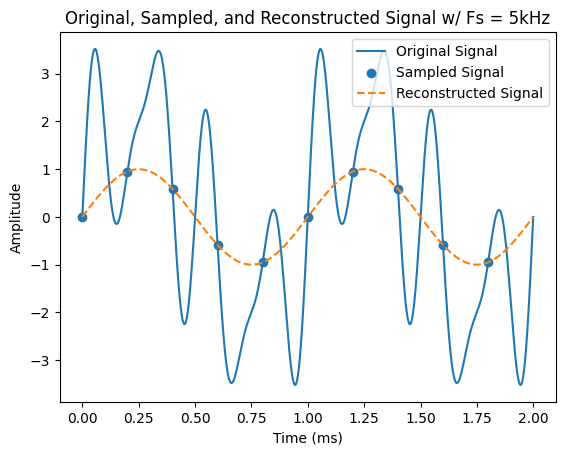

In [15]:
Fs = 5e3
Ft = 5e5
t0 = 0
tf = 0.002
t = np.arange(t0, tf, 1 / Ft)
nT = np.arange(t0, tf, 1 / Fs)

x = lambda t : 2 * np.sin(2 * np.pi * 1000 * t) + 2 * np.sin(2 * np.pi * 4000 * t) + np.sin(2 * np.pi * 6000 * t)
xr = lambda t : np.sin(2 * np.pi * 1000 * t)

xt = x(t)
xn = x(nT)
xrt = xr(t)

plt.figure(1)
plt.plot(1000*t, xt)
plt.scatter(1000*nT, xn)
plt.plot(1000*t, xrt, linestyle="--")
plt.legend(["Original Signal", "Sampled Signal", "Reconstructed Signal"], loc="upper right")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Original, Sampled, and Reconstructed Signal w/ Fs = 5kHz")
plt.show()


The higher frequency components of this signal alias, which prevents us from reconstructing the signal to match the original.  This is because the sampling frequency of the system is lower than the Nyquist frequency of the two higher frequency components.

#### 10 kHz

Same process as above is used, except $F_s=10$ kHz.  Only the highest frequency component aliases.

$$\omega_1 = \frac{1}{5}\pi,\text{ }\omega_2 = \frac{4}{5}\pi,\text{ }\omega_3 = \frac{6}{5}\pi = -\frac{4}{5}\pi$$

$$x_r(t) = 2\sin(2\pi1000t) + 2\sin(2\pi4000t) - \sin(2\pi4000t) = 2\sin(2\pi1000t) + \sin(2\pi4000t)$$

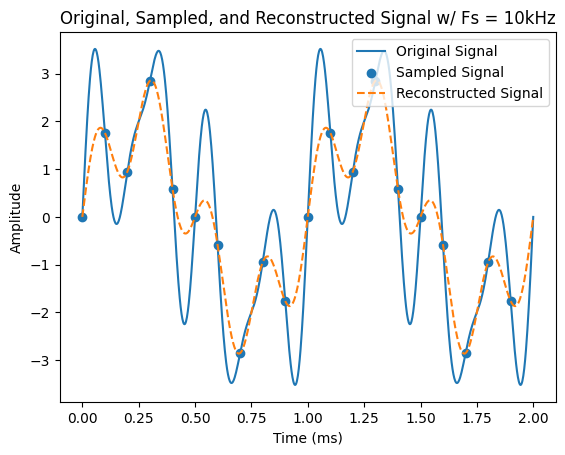

In [14]:
Fs = 10e3
Ft = 5e5
t0 = 0
tf = 0.002
t = np.arange(t0, tf, 1 / Ft)
nT = np.arange(t0, tf, 1 / Fs)

x = lambda t : 2 * np.sin(2 * np.pi * 1000 * t) + 2 * np.sin(2 * np.pi * 4000 * t) + np.sin(2 * np.pi * 6000 * t)
xr = lambda t : 2 * np.sin(2 * np.pi * 1000 * t) + np.sin(2 * np.pi * 4000 * t)

xt = x(t)
xn = x(nT)
xrt = xr(t)

plt.figure(1)
plt.plot(1000*t, xt)
plt.scatter(1000*nT, xn)
plt.plot(1000*t, xrt, linestyle="--")
plt.legend(["Original Signal", "Sampled Signal", "Reconstructed Signal"], loc="upper right")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Original, Sampled, and Reconstructed Signal w/ Fs = 10kHz")
plt.show()

#### 20 kHz

$$
\omega_1 = \frac{1}{10}\pi,\text{ }\omega_2 = \frac{2}{5}\pi,\text{ }\omega_3 = \frac{3}{5}\pi
$$

No aliasing occurs as all frequencies are in the range $-\pi\leq\omega\leq\pi$ therefore reconstructed signal should match original signal.

$$
x(t) = 2\sin(2\pi 1000 t) + 2 \sin ( 2 \pi 4000 t) + \sin( 2 \pi 6000 t)
$$

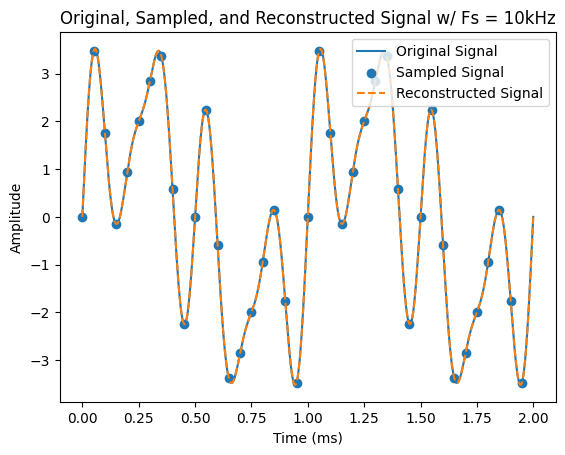

In [13]:
Fs = 20e3
Ft = 5e5
t0 = 0
tf = 0.002
t = np.arange(t0, tf, 1 / Ft)
nT = np.arange(t0, tf, 1 / Fs)

x = lambda t : 2 * np.sin(2 * np.pi * 1000 * t) + 2 * np.sin(2 * np.pi * 4000 * t) + np.sin(2 * np.pi * 6000 * t)

xt = x(t)
xn = x(nT)
xrt = x(t)

plt.figure(1)
plt.plot(1000*t, xt)
plt.scatter(1000*nT, xn)
plt.plot(1000*t, xrt, linestyle="--")
plt.legend(["Original Signal", "Sampled Signal", "Reconstructed Signal"], loc="upper right")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Original, Sampled, and Reconstructed Signal w/ Fs = 10kHz")
plt.show()

### Exercise #2
In this exercise, you will reconstruct a signal from its samples using the interpolation formula (using the sinc function). Consider the following analog signal:

\begin{equation*}
x_a(t) = e^{-1000|t|}
\end{equation*}

The bandwidth of this signal is approximately 2,000 Hz. When plotting the continuous-time signal and when using the reconstruction use a spacing of the continuous time variable $t$ of 0.00005 seconds on a range of $-0.005 \leq t \leq 0.005$.

1. Sample this signal at $F_s = 5,000$ samples/second. Plot the original signal, the samples, and the reconstructed signal using the interpolation formula.
2. Repeat part 1 for a new sampling frequency of $F_s = 1,000$ samples/second.
3. Explain your results.

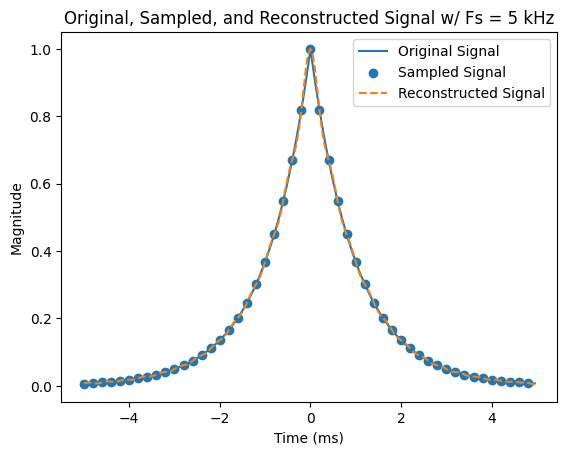

In [31]:
Fs = 5e3
Ft = 20e3
t = np.arange(-0.005, 0.005, 1 / Ft)
nT = np.arange(-0.005, 0.005, 1 / Fs)
n = nT * Fs
N = len(n)
T = 1 / Fs

xa = lambda t : np.exp(-1000 * np.abs(t))

xat = xa(t)
xan = xa(nT)
xrt = np.matmul(xan.reshape((1, -1)), np.sinc(np.matmul(np.ones((N, 1)), t.reshape((1, -1))) / T - np.matmul(nT.reshape((-1, 1)), np.ones((1, len(t)))) / T)).flatten()

plt.figure(4)
plt.plot(1000*t, xat)
plt.scatter(1000*nT, xan)
plt.plot(1000*t, xrt, linestyle="--")
plt.title("Original, Sampled, and Reconstructed Signal w/ Fs = 5 kHz")
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude")
plt.legend(["Original Signal", "Sampled Signal", "Reconstructed Signal"], loc="upper right")
plt.show()

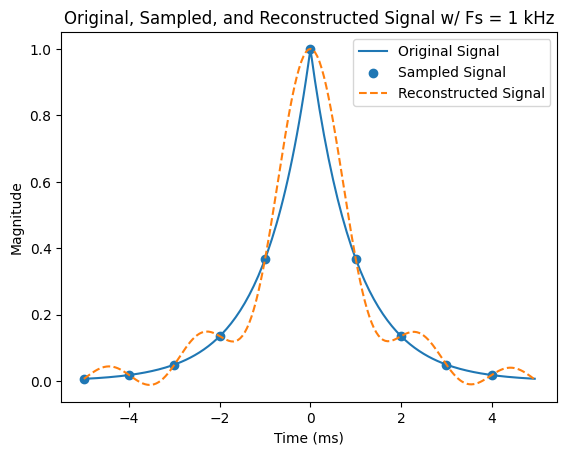

In [33]:
Fs = 1e3
Ft = 20e3
t = np.arange(-0.005, 0.005, 1 / Ft)
nT = np.arange(-0.005, 0.005, 1 / Fs)
n = nT * Fs
N = len(n)
T = 1 / Fs

xa = lambda t : np.exp(-1000 * np.abs(t))

xat = xa(t)
xan = xa(nT)
xrt = np.matmul(xan.reshape((1, -1)), np.sinc(np.matmul(np.ones((N, 1)), t.reshape((1, -1))) / T - np.matmul(nT.reshape((-1, 1)), np.ones((1, len(t)))) / T)).flatten()

plt.figure(4)
plt.plot(1000*t, xat)
plt.scatter(1000*nT, xan)
plt.plot(1000*t, xrt, linestyle="--")
plt.title("Original, Sampled, and Reconstructed Signal w/ Fs = 1 kHz")
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude")
plt.legend(["Original Signal", "Sampled Signal", "Reconstructed Signal"], loc="upper right")
plt.show()

As can be seen, signals can be reconstructed using a sum of sinc functions (which represent the impulse response of an ideal low pass filter).  However, with a finite number of measurements, there is some inaccuracy in the reconstruction.  The fewer measurements there are (either from shortening the overall length of the signal or from lowering the sampling frequency), the worse the reconstruction is.  Additionally, this reconstruction filter is non causal, which would make it impossible to apply to a real time system.  Therefore we need something different.